In [1]:
print("Hello Data")

Hello Data


### Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

### Loading our Dataset

In [4]:
df = pd.read_csv('Mall_Customers.csv')

In [5]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Feature engineering

In [6]:
# Converting gender column from categoral to Numerical
df['Gender'] = LabelEncoder().fit_transform(df['Gender']) 

In [7]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [8]:
# Step 4: Select Features for Clustering
features = ['Age', 'Gender', 'Spending Score (1-100)']
X = df[features]

In [9]:
X

,Age,Gender,Spending Score (1-100)
0,19,1,39
1,21,1,81
2,20,0,6
3,23,0,77
4,31,0,40
...,...,...,...
195,35,0,79
196,45,0,28
197,32,1,74
198,32,1,18


In [10]:
# Step 5: Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_scaled

array([[-1.42456879,  1.12815215, -0.43480148],
       [-1.28103541,  1.12815215,  1.19570407],
       [-1.3528021 , -0.88640526, -1.71591298],
       [-1.13750203, -0.88640526,  1.04041783],
       [-0.56336851, -0.88640526, -0.39597992],
       [-1.20926872, -0.88640526,  1.00159627],
       [-0.27630176, -0.88640526, -1.71591298],
       [-1.13750203, -0.88640526,  1.70038436],
       [ 1.80493225,  1.12815215, -1.83237767],
       [-0.6351352 , -0.88640526,  0.84631002],
       [ 2.02023231,  1.12815215, -1.4053405 ],
       [-0.27630176, -0.88640526,  1.89449216],
       [ 1.37433211, -0.88640526, -1.36651894],
       [-1.06573534, -0.88640526,  1.04041783],
       [-0.13276838,  1.12815215, -1.44416206],
       [-1.20926872,  1.12815215,  1.11806095],
       [-0.27630176, -0.88640526, -0.59008772],
       [-1.3528021 ,  1.12815215,  0.61338066],
       [ 0.94373197,  1.12815215, -0.82301709],
       [-0.27630176, -0.88640526,  1.8556706 ],
       [-0.27630176,  1.12815215, -0.590

### Fiting Our Model

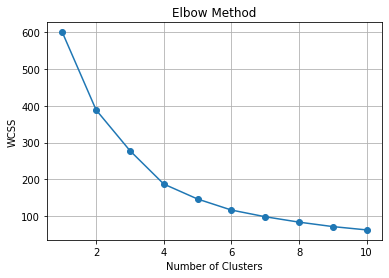

In [12]:
# Step 6: Find Optimal Number of Clusters (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [13]:
# Step 7: Fit KMeans with Chosen k (e.g., k=4)
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

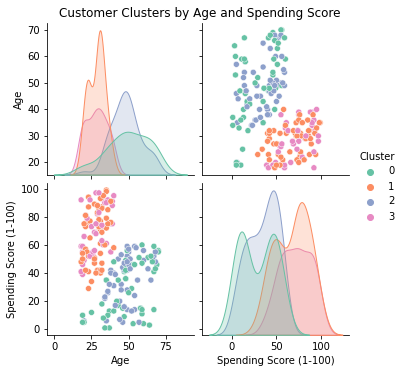

In [18]:
# Step 8: Visualize Clusters
sns.pairplot(df, vars=['Age', 'Spending Score (1-100)'], hue='Cluster', palette='Set2')
plt.suptitle('Customer Clusters by Age and Spending Score', y=1.02)
plt.show()

In [17]:
# Step 9: Analyze Cluster Characteristics
cluster_summary = df.groupby('Cluster')[['Age', 'Gender', 'Spending Score (1-100)']].mean()
print(cluster_summary)

               Age  Gender  Spending Score (1-100)
Cluster                                           
0        49.437500     1.0               29.208333
1        28.438596     0.0               67.684211
2        48.109091     0.0               34.781818
3        28.250000     1.0               71.675000
